<a href="https://colab.research.google.com/github/sokrypton/ws2023/blob/main/day2/PCA_approx.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# dimensionality reduction methods
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA

In [ ]:
#@title secret plotting functions <- RUN THIS
import plotly.graph_objs as go
from matplotlib.colors import ListedColormap
colorway = ["#1f77b4", "#ff7f0e", "#2ca02c",
              "#d62728","#9467bd", "#8c564b",
              "#e377c2", "#7f7f7f", "#bcbd22",
              "#17becf"]

c10 = lambda x: ListedColormap(colorway[:x])

def make_2D_plot(values, groups=None, s=10, c=None, cmap=None):
  '''
  Given values and groups, returns a scatter plot colored by group
  '''
  if groups is None:
    groups = np.zeros(len(values),int)
    if c is None: c = np.arange(len(values))
    if cmap is None: cmap = "plasma"
  for group in np.unique(groups):
    idx = groups == group
    plt.scatter(values[idx, 0], values[idx, 1],
                label=group, s=s, c=c, cmap=cmap)
  if len(np.unique(groups)) > 1:
    plt.legend(bbox_to_anchor=(1, 0, 0.5, 1), loc="upper left",)
  plt.axis("equal")
    
def make_3D_plot(values, groups=None, s=3, c=None):
  if groups is None:
    groups = np.zeros(len(values),int)
    if c is None: c = np.arange(len(values))
  plot = []
  for group in np.unique(groups):
    idx = groups == group
    plot.append(go.Scatter3d(
        x=values[idx,0],
        y=values[idx,1],
        z=values[idx,2],
        name=str(group),
        mode='markers',
        marker=dict(size=s,color=c)))   
  go.Figure(data=plot,layout=go.Layout(
      colorway=colorway, scene={"aspectmode":"data"})).show()

def optimize(w, loss, iter=100, lr=1.0, b1=0.9, b2=0.999):
  g_loss = grad(loss)
  mt,vt = jp.zeros_like(w),jp.zeros_like(w)
  for k in range(iter):
    g = g_loss(w)
    mt = b1*mt + (1-b1)*g
    vt = b2*vt + (1-b2)*jp.sum(jp.square(g))
    t = jp.sqrt(1-jp.power(b2,k+1))/(1-jp.power(b1,k+1))
    w = w - lr * t * mt/(jp.sqrt(vt))
    if (k+1) % (iter//10) == 0:
      print(k+1,loss(w))
  return w

In [ ]:
A, groups = make_blobs(n_samples=500, n_features=3, centers=5)
A = A - A.mean(0)

In [ ]:
pca = PCA(n_components=2).fit(A)
B = pca.transform(A)
A_ = pca.inverse_transform(B)

# mean_squared_error
np.square(A-A_).mean()

2.583496307817007

In [ ]:
X = np.zeros((100,100))
X[50:] = 1
X += np.random.normal(size=(100,100))

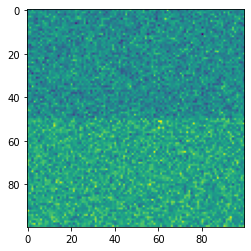

In [ ]:
plt.imshow(X)

In [ ]:
pca = PCA().fit(X)
#Y = pca.transform(X)
#X_ = pca.inverse_transform(Y)


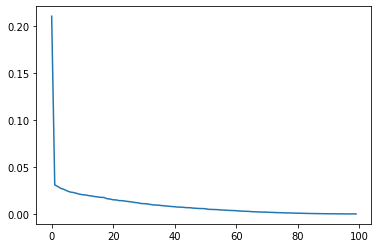

In [ ]:
plt.plot(pca.explained_variance_ratio_)

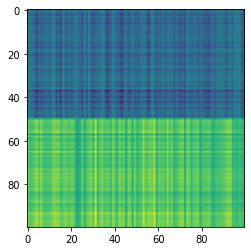

In [ ]:
plt.imshow(X_)

In [ ]:
A.shape

(500, 3)

In [ ]:
B.shape

(500, 2)

In [ ]:
A_.shape

(500, 3)

In [ ]:
# special version of numpy
import jax.numpy as jp
from jax import grad

In [ ]:
def do_approx_pca(a, n_components=2, iter=300):
  N,F = a.shape
  a = jp.array(a)

  # define loss
  def loss(w):
    # transform a to b to a_
    b = a@w
    a_ = b@w.T
    
    # return mse
    return jp.square(a_ - a).mean()
 
  # initialize with random w
  w = jp.array(np.random.normal(size=(F,n_components)))

  
  # optimize w
  w = optimize(w,loss,iter)
  
  # transform a to b to a_
  b = a@w
  a_ = b@w.T

  return np.array(b), np.array(a_)

In [ ]:
B_test, A_test_ = do_approx_pca(A,2)

/usr/local/lib/python3.6/dist-packages/jax/lib/xla_bridge.py:130: UserWarning:

No GPU/TPU found, falling back to CPU.



30 5.0875225
60 2.7543964
90 2.5866723
120 2.583728
150 2.5835025
180 2.583497
210 2.5834968
240 2.5834963
270 2.5834963
300 2.5834963


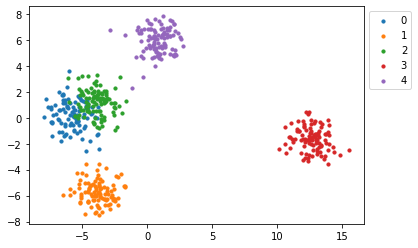

In [ ]:
make_2D_plot(B,groups)

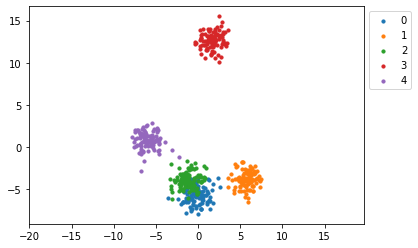

In [ ]:
make_2D_plot(B_test,groups)

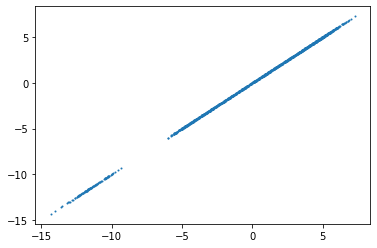

In [ ]:
plt.scatter(A_, A_test_, s=1)